In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings(action= 'ignore')

In [2]:
df_purchase= pd.read_csv('./purchase_history.csv')
df_item_id= pd.read_csv('./item_to_id.csv')

In [3]:
df_purchase.head()

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


In [4]:
df_purchase.shape

(39474, 2)

In [5]:
df_item_id.head()

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39


In [6]:
df_item_id.shape

(48, 2)

In [7]:
df_item_id.Item_id.max()

48

In [8]:
le= LabelEncoder()
df_purchase.user_id= le.fit_transform(df_purchase.user_id)

In [9]:
df_purchase.user_id.max()

24884

In [10]:
df_purchase.id= df_purchase.id.str.split(',')

- Creating a matrix of shape (48, 24884), where each entry represents number of times each item was bought by each customer.

In [11]:
count_matrix= np.zeros((df_item_id.Item_id.max(), df_purchase.user_id.max()+1))

In [12]:
for _, row in df_purchase.iterrows():
    user_id= row.user_id
    items= row.id
    for item in items:
        count_matrix[int(item)-1, int(user_id)]+= 1

In [13]:
count_matrix.shape

(48, 24885)

# Problem 1

In [14]:
answer= count_matrix.sum(axis= 0).argmax()

In [15]:
print(f'Customer with most purchases is : {le.inverse_transform(answer)}')

Customer with most purchases is : 269335


# Problem 2

In [16]:
answer= count_matrix.argmax(axis= 1)

In [17]:
for item in range(df_item_id.Item_id.max()):
    print(f'For item {item + 1}: Customer Id {le.inverse_transform(answer[item])}')

For item 1: Customer Id 31625
For item 2: Customer Id 31625
For item 3: Customer Id 154960
For item 4: Customer Id 5289
For item 5: Customer Id 217277
For item 6: Customer Id 334664
For item 7: Customer Id 175865
For item 8: Customer Id 151926
For item 9: Customer Id 269335
For item 10: Customer Id 618914
For item 11: Customer Id 367872
For item 12: Customer Id 557904
For item 13: Customer Id 653800
For item 14: Customer Id 172120
For item 15: Customer Id 143741
For item 16: Customer Id 73071
For item 17: Customer Id 366155
For item 18: Customer Id 917199
For item 19: Customer Id 31625
For item 20: Customer Id 885474
For item 21: Customer Id 884172
For item 22: Customer Id 1199670
For item 23: Customer Id 920002
For item 24: Customer Id 189913
For item 25: Customer Id 68282
For item 26: Customer Id 967573
For item 27: Customer Id 956666
For item 28: Customer Id 204624
For item 29: Customer Id 394348
For item 30: Customer Id 21779
For item 31: Customer Id 289360
For item 32: Customer Id

# Problem 3

- The approach for solving this problem is to do Singular Value Decomposition of the count matrix created above in order to get a lower dimensional feature representation of all the individual items.

In [18]:
svd= TruncatedSVD(n_components= 2, n_iter= 100, random_state= 1995)

In [19]:
svd.fit(count_matrix)

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=100,
       random_state=1995, tol=0.0)

In [20]:
item_features= svd.transform(count_matrix)

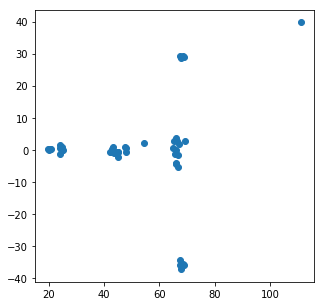

In [21]:
plt.figure(figsize=(5, 5))
plt.scatter(item_features[:, 0], item_features[:, 1])
plt.show()

- The figure above is a two dimensional plot of all the items in the dataset. There are clear 5 clusters which can be extracted.

In [29]:
clusterer= KMeans(n_clusters= 5, random_state= 1995)

In [30]:
clusterer.fit(item_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1995, tol=0.0001, verbose=0)

In [31]:
labels= clusterer.predict(item_features)

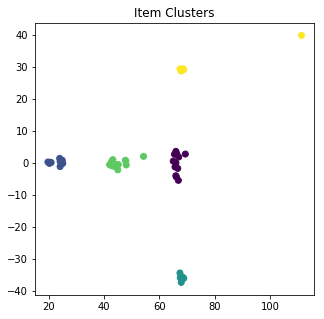

In [32]:
plt.figure(figsize=(5, 5))
plt.scatter(item_features[:, 0], item_features[:, 1], c= labels)
plt.title('Item Clusters')
plt.show()

In [33]:
df_item_id.sort_values('Item_id', inplace= True)

In [34]:
df_item_id['Group']= labels 

In [36]:
for label in range(0, 5):
    print(f'Label:{label} =>', df_item_id.loc[df_item_id.Group== label, 'Item_name'].values.tolist(), '\n')

Label:0 => ['sugar', 'poultry', 'soda', 'bagels', 'beef', 'tea', 'tortillas', 'dinner rolls', 'juice', 'sandwich loaves', 'coffee', 'pork'] 

Label:1 => ['baby items', 'waffles', 'sandwich bags', 'cereals', 'shampoo', 'aluminum foil', 'shaving cream', 'paper towels', 'hand soap', 'flour', 'pasta', 'toilet paper', 'soap'] 

Label:2 => ['grapefruit', 'cherries', 'apples', 'berries', 'bananas'] 

Label:3 => ['pet items', 'butter', 'eggs', 'milk', 'laundry detergent', 'cheeses', 'frozen vegetables', 'spaghetti sauce', 'dishwashing\xa0', 'canned vegetables', 'ice cream', 'ketchup', 'yogurt'] 

Label:4 => ['lettuce', 'carrots', 'cucumbers', 'broccoli', 'cauliflower'] 



### Analysis:
- Label 0 mostly contains poultry items
- Label 1 mostly contains toiletries
- Label 2 contains fruits
- Label 3 mostly contains dairy products
- Label 4 contains vegetables